In [1]:
from tqdm.auto import tqdm

import os
import requests
import zipfile
import cv2
import math
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
import seaborn as sns
import pandas as pd 

from PIL import Image

In [4]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from ultralytics import YOLO
model = YOLO("yolo11m.pt")

In [4]:
results = model.train(
   data='/kaggle/input/mini-project/data.yaml',
   imgsz=128,
   epochs=50,
   batch=16,
   name='yolov11_m'
)

Ultralytics 8.3.68 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/input/mini-project/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov11_m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 3.64MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /kaggle/input/mini-project/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:09<00:00, 230.32it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/mini-project/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/mini-project/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:02<00:00, 240.60it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/mini-project/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov11_m/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs/detect/yolov11_m
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.855      2.168      1.232         20        128: 100%|██████████| 134/134 [04:47<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:40<00:00,  2.03s/it]

                   all        612        612      0.518      0.427      0.384      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.907      1.717      1.246         30        128: 100%|██████████| 134/134 [04:39<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]

                   all        612        612      0.283      0.215      0.204      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G        1.9      1.687      1.228         23        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.423       0.51      0.449      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.851      1.609      1.196         23        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.95s/it]

                   all        612        612      0.494      0.396      0.406      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.755      1.534      1.174         23        128: 100%|██████████| 134/134 [04:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.85s/it]

                   all        612        612      0.639      0.577      0.615      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       1.68      1.409      1.151         23        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:39<00:00,  1.97s/it]

                   all        612        612      0.723      0.591      0.662      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.625      1.369      1.137         25        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.90s/it]

                   all        612        612      0.719      0.652       0.71      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.601      1.327      1.129         26        128: 100%|██████████| 134/134 [04:37<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.91s/it]

                   all        612        612      0.705      0.699       0.72      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.578       1.33      1.125         24        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]

                   all        612        612      0.697      0.674       0.72       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.528      1.248       1.12         32        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.90s/it]

                   all        612        612      0.693      0.681       0.73       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.535      1.246      1.112         21        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.705      0.666      0.702      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.486      1.184        1.1         25        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:39<00:00,  1.95s/it]

                   all        612        612      0.779      0.702      0.769      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.471      1.168      1.094         15        128: 100%|██████████| 134/134 [04:36<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]

                   all        612        612      0.803      0.708        0.8      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.444      1.143      1.087         26        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
      16/50         0G      1.403      1.104      1.081         29        128: 100%|██████████| 134/134 [04:35<00:00,  2.05s/it]1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.85s/it]

                   all        612        612      0.792      0.721       0.79      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.401      1.088      1.071         31        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.783      0.764      0.821       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.344      1.035      1.059         26        128: 100%|██████████| 134/134 [04:35<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.83s/it]

                   all        612        612      0.836      0.782      0.848      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.332      1.017      1.047         28        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.817      0.775      0.845      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.313     0.9785       1.04         26        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]

                   all        612        612      0.852      0.765      0.835      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.324     0.9905      1.043         21        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.798      0.706      0.801      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.308     0.9864       1.05         24        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.798      0.766      0.807      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.307      0.982      1.048         19        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.90s/it]

                   all        612        612       0.84      0.793      0.849      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.273     0.9473      1.048         20        128: 100%|██████████| 134/134 [04:33<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.89s/it]

                   all        612        612      0.838      0.787      0.849       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.246     0.9308      1.033         24        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.89s/it]

                   all        612        612      0.824       0.78      0.849      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.258     0.9207      1.022         23        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.90s/it]

                   all        612        612      0.828      0.758      0.833      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.224     0.9083      1.026         21        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.89s/it]

                   all        612        612       0.81      0.789      0.835      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.244     0.9133      1.026         28        128: 100%|██████████| 134/134 [04:35<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.841      0.795      0.862      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.211     0.8905      1.017         24        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.814      0.804      0.857      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.201     0.8566      1.022         29        128: 100%|██████████| 134/134 [04:33<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.848      0.785      0.852       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.191     0.8581      1.009         25        128: 100%|██████████| 134/134 [04:35<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.836      0.808      0.864      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.187      0.835       1.02         34        128: 100%|██████████| 134/134 [04:34<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]

                   all        612        612      0.834      0.803      0.861      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G       1.17     0.8414      1.006         23        128: 100%|██████████| 134/134 [04:35<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:39<00:00,  1.97s/it]

                   all        612        612      0.833      0.796      0.861      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.155     0.8283      1.005         20        128: 100%|██████████| 134/134 [04:41<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.88s/it]

                   all        612        612      0.869      0.809      0.887      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.144     0.8166      1.002         27        128: 100%|██████████| 134/134 [04:43<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.89s/it]

                   all        612        612      0.839      0.814      0.874      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.146     0.8027      1.002         25        128: 100%|██████████| 134/134 [04:41<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.93s/it]

                   all        612        612      0.873      0.795      0.864        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.142     0.8037      1.011         28        128: 100%|██████████| 134/134 [04:41<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.853      0.804      0.875      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.127     0.7876     0.9947         31        128: 100%|██████████| 134/134 [04:41<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:41<00:00,  2.05s/it]

                   all        612        612      0.854      0.805      0.872      0.616


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:37<00:00,  1.87s/it]

                   all        612        612      0.872      0.814      0.882      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9809     0.6298     0.9571         16        128: 100%|██████████| 134/134 [04:43<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:39<00:00,  1.99s/it]

                   all        612        612       0.87      0.834      0.897      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9725     0.6115     0.9602         16        128: 100%|██████████| 134/134 [04:40<00:00,  2.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612       0.87      0.815       0.89      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.9694     0.6023     0.9615         16        128: 100%|██████████| 134/134 [04:40<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612       0.88      0.823      0.895      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.9409     0.5931     0.9504         16        128: 100%|██████████| 134/134 [04:40<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

                   all        612        612      0.872      0.828      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.9361     0.5764     0.9475         16        128: 100%|██████████| 134/134 [04:40<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:46<00:00,  2.30s/it]

                   all        612        612      0.873      0.855      0.903      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.9102     0.5697     0.9382         16        128: 100%|██████████| 134/134 [04:42<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:39<00:00,  1.96s/it]

                   all        612        612      0.863      0.854      0.902      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.9161     0.5676     0.9389         16        128: 100%|██████████| 134/134 [04:42<00:00,  2.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:41<00:00,  2.10s/it]

                   all        612        612      0.891      0.841      0.902      0.655



50 epochs completed in 4.409 hours.
Optimizer stripped from runs/detect/yolov11_m/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/yolov11_m/weights/best.pt, 40.5MB

Validating runs/detect/yolov11_m/weights/best.pt...
Ultralytics 8.3.68 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:36<00:00,  1.83s/it]


                   all        612        612      0.891      0.842      0.902      0.655
                glioma        285        285      0.799      0.696      0.788      0.477
            meningioma        142        142      0.946      0.908      0.957      0.792
             pituitary        185        185      0.929       0.92       0.96      0.695


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 52.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/yolov11_m


<Figure size 1000x600 with 0 Axes>

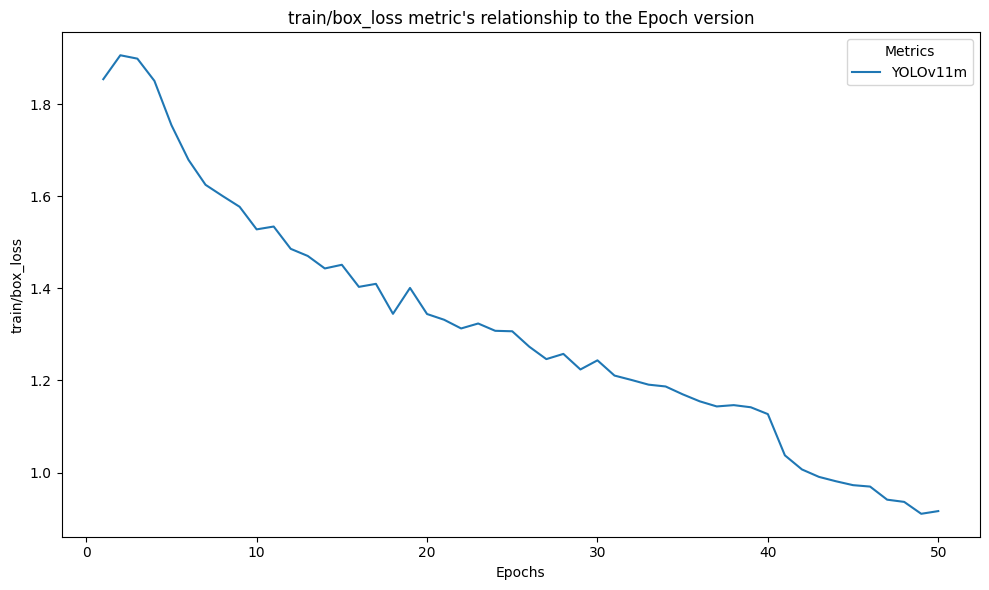

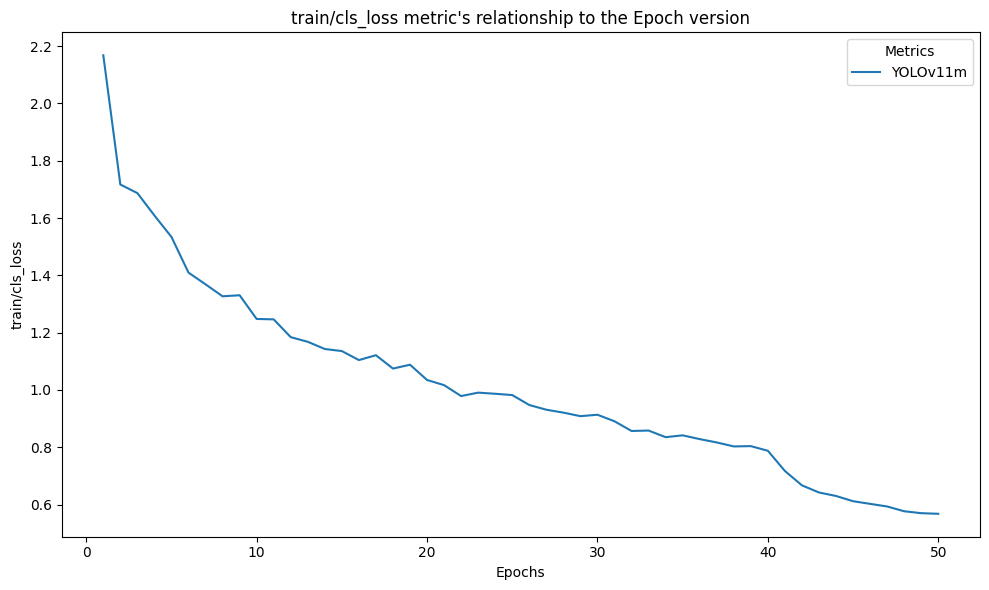

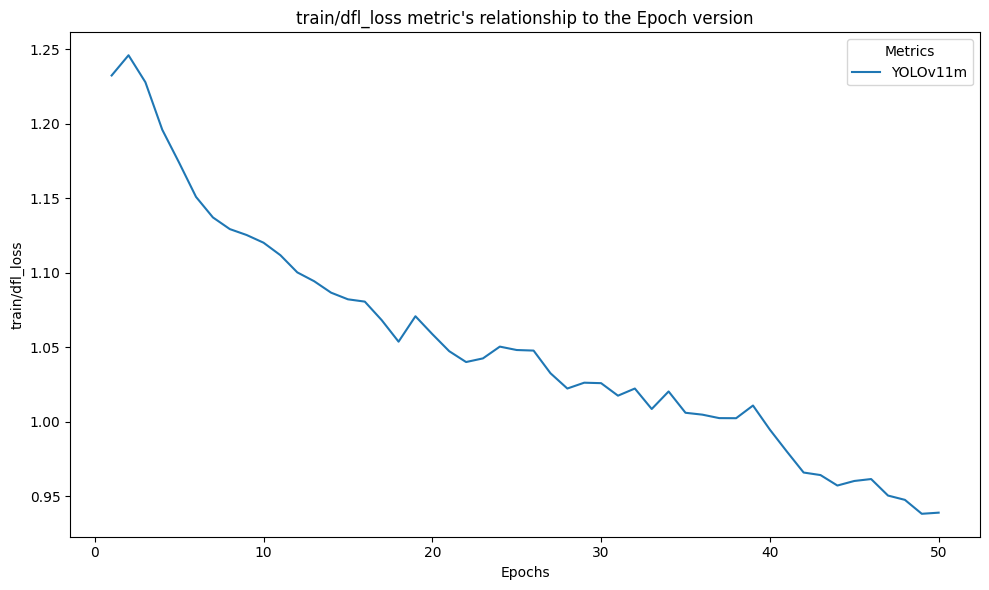

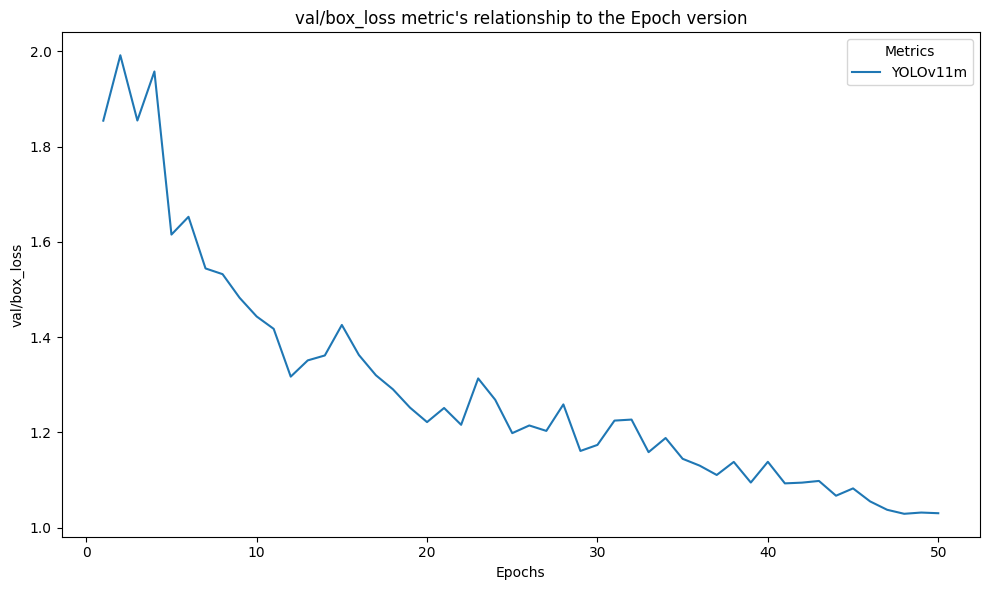

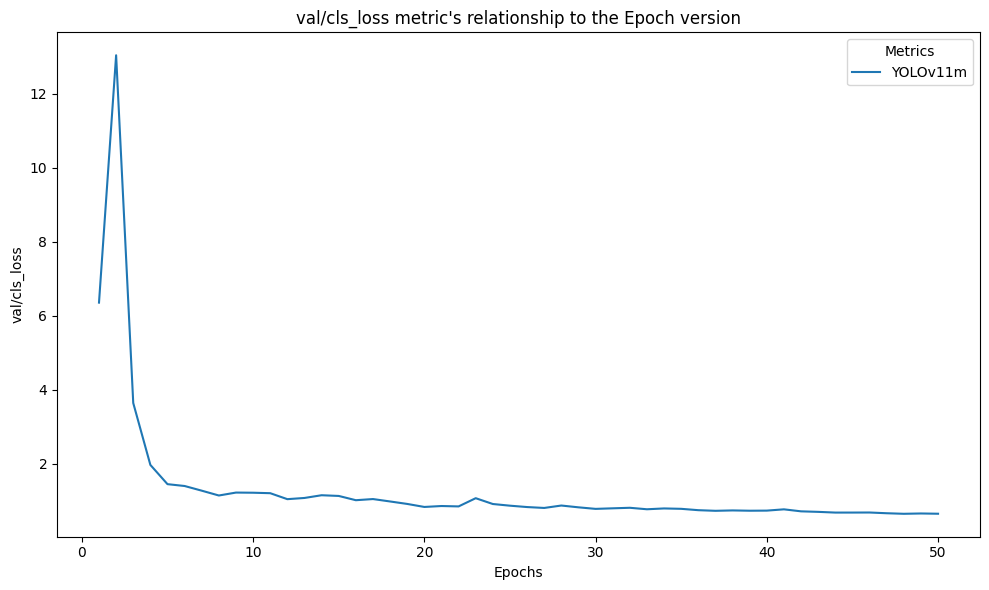

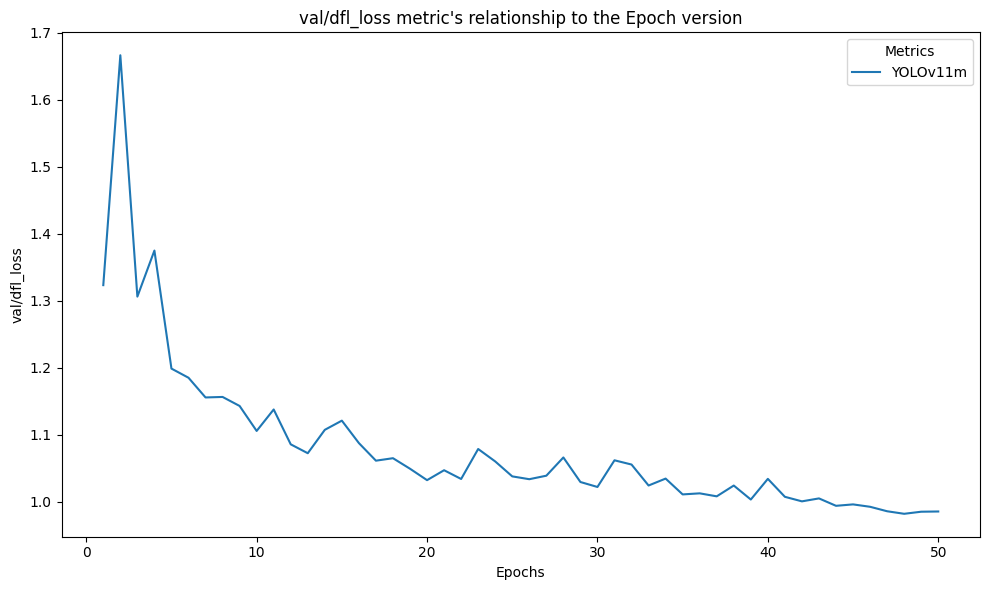

In [5]:
import pandas as pd
import seaborn as sns 

df = pd.read_csv('runs/detect/yolov11_m/results.csv')

metrics = ['train/box_loss','train/cls_loss','train/dfl_loss','val/box_loss','val/cls_loss','val/dfl_loss']

plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='epoch', y=metric, data=df, label="YOLOv11m")
    
    plt.title(f"{metric} metric's relationship to the Epoch version")
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric}")
    plt.legend(title="Metrics")
    plt.tight_layout()
    
    plt.show()

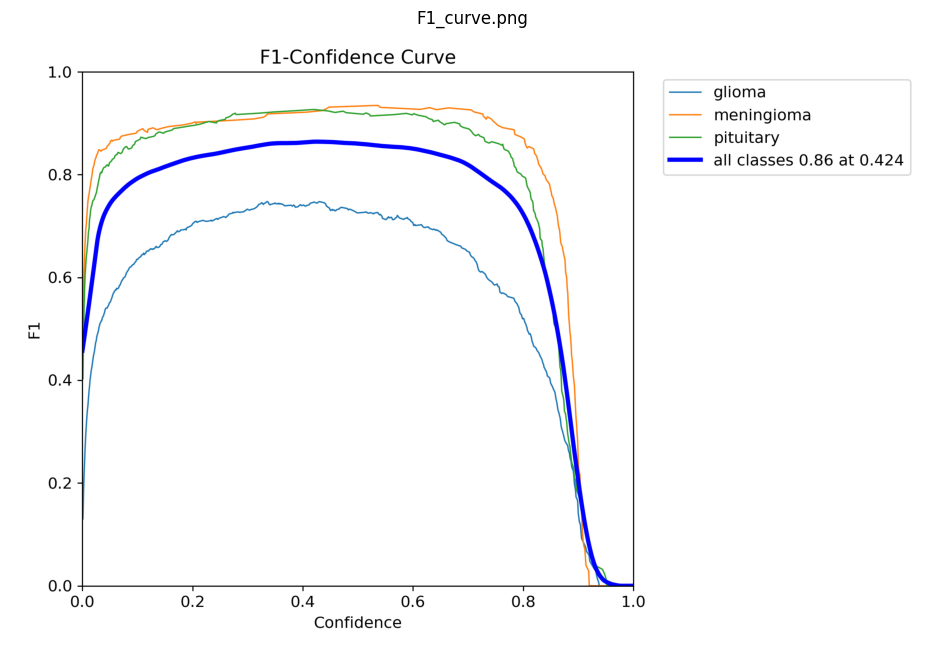

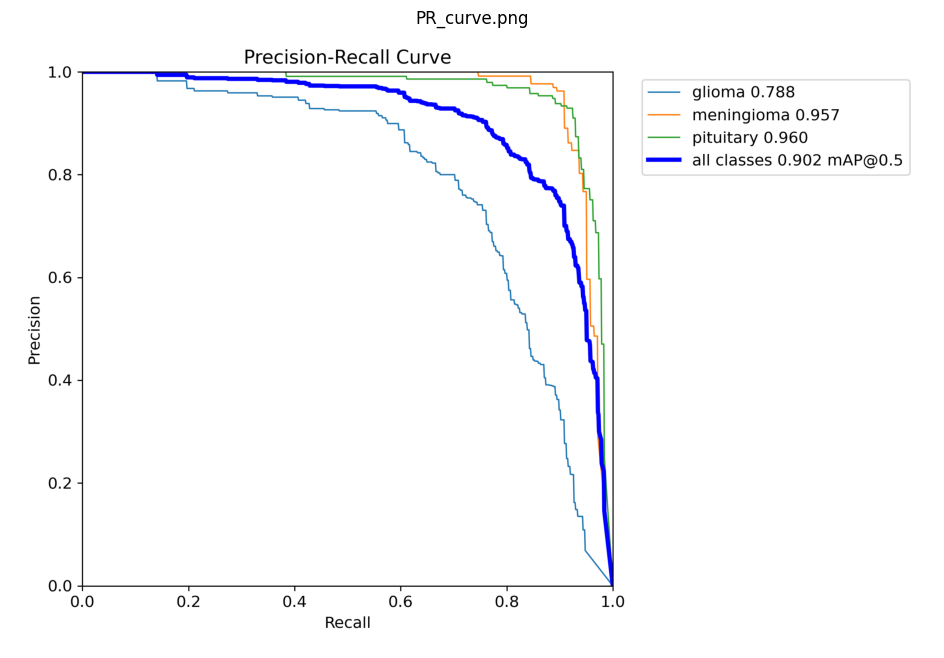

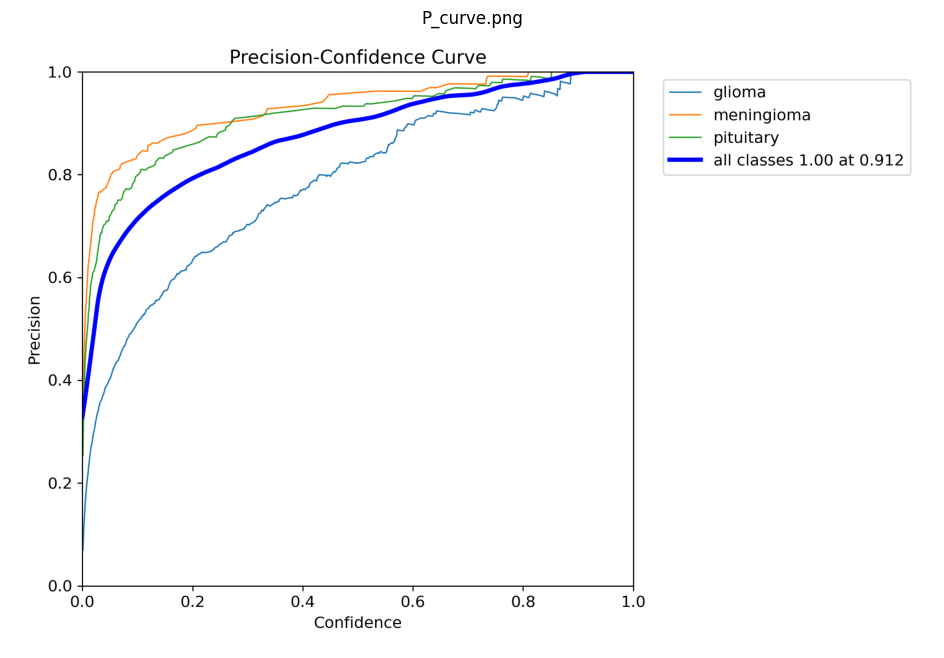

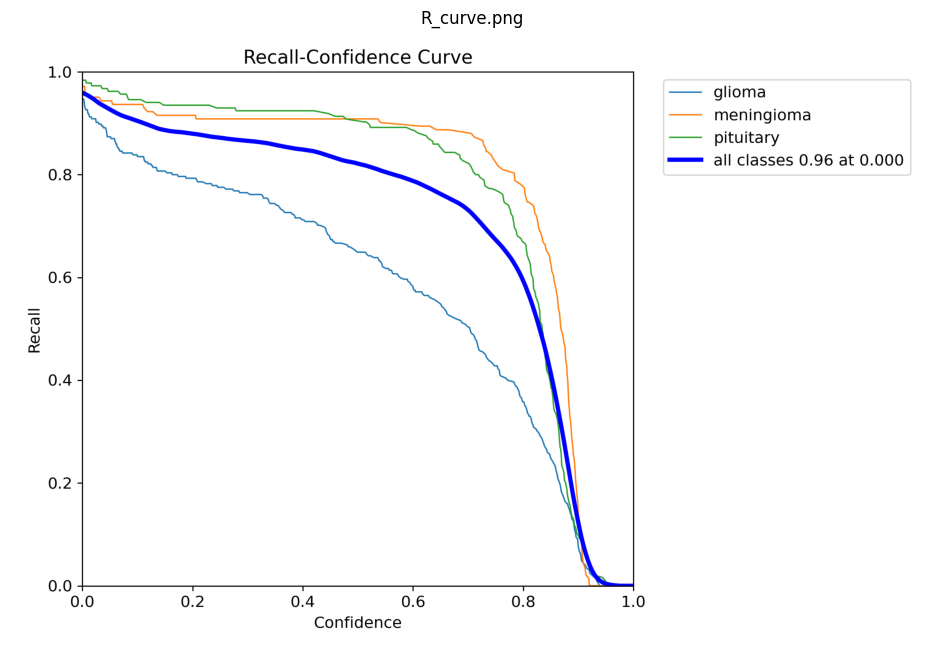

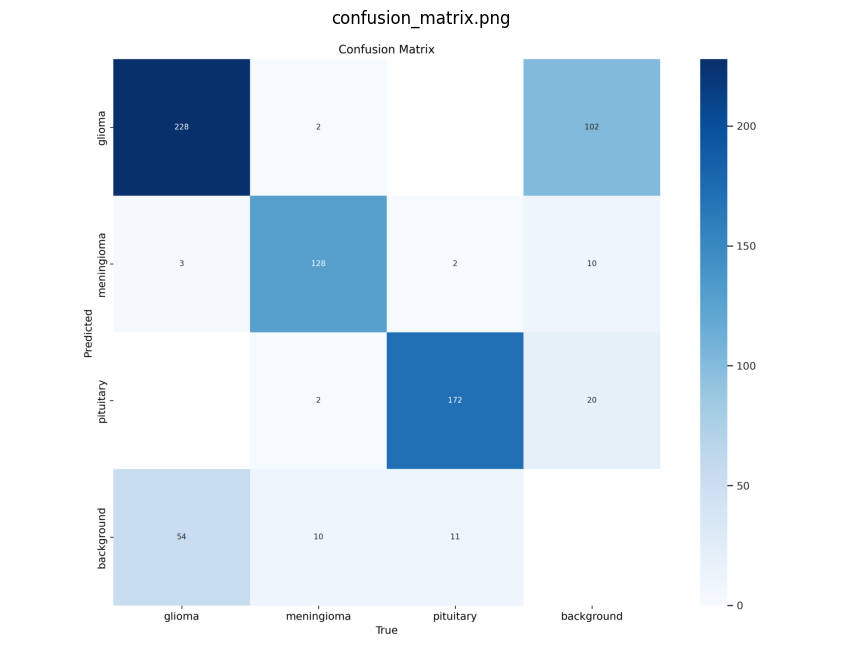

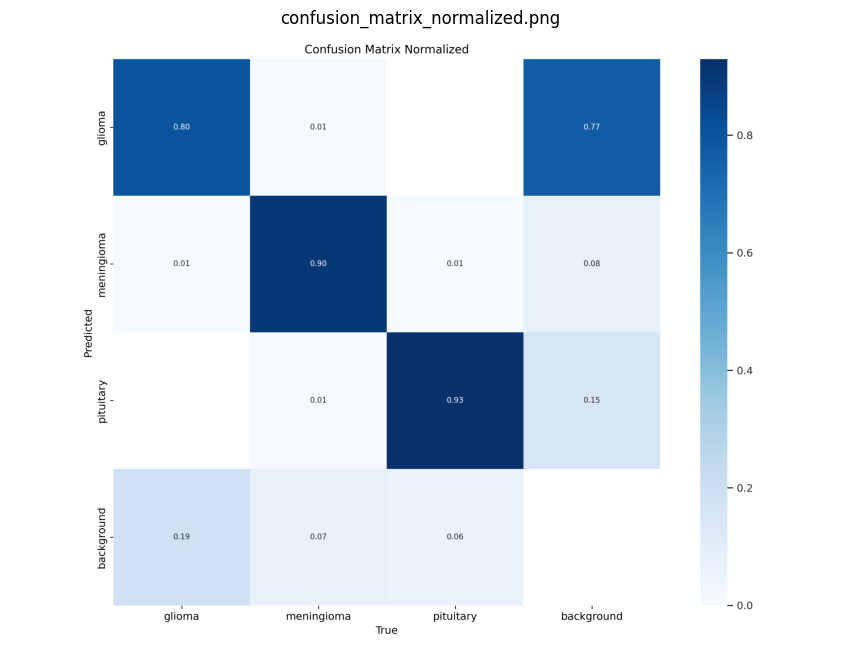

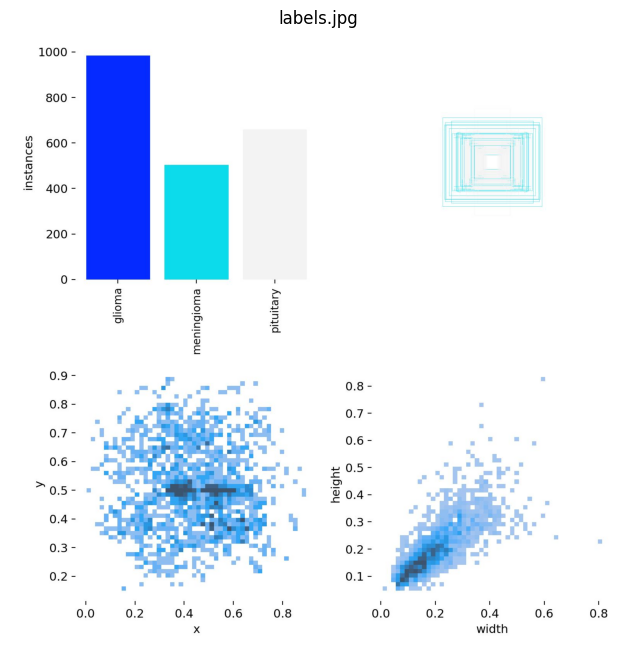

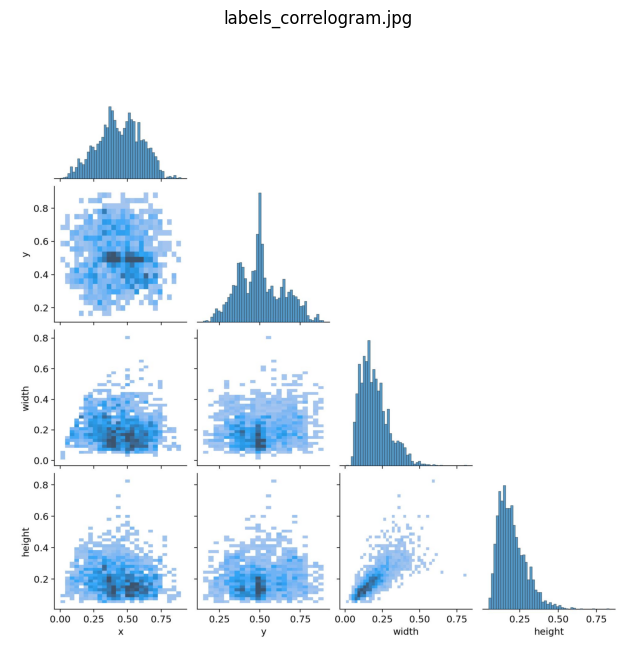

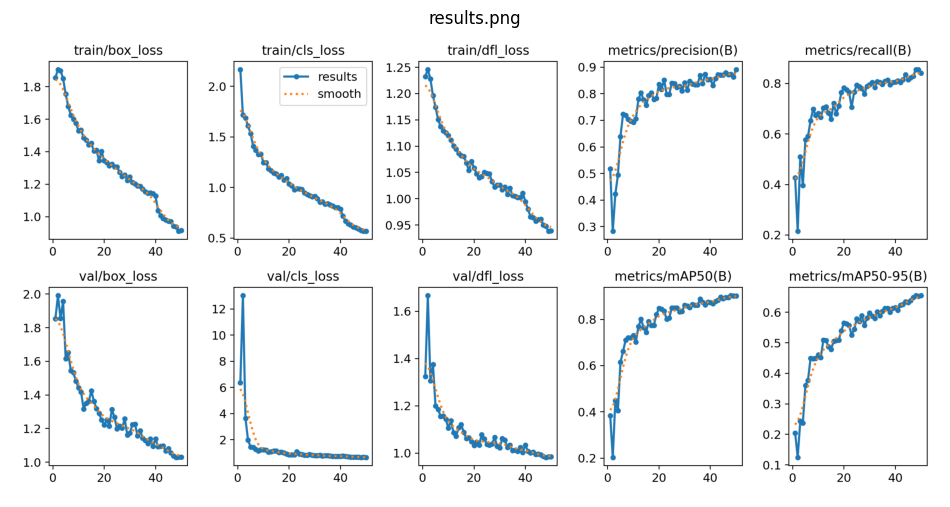

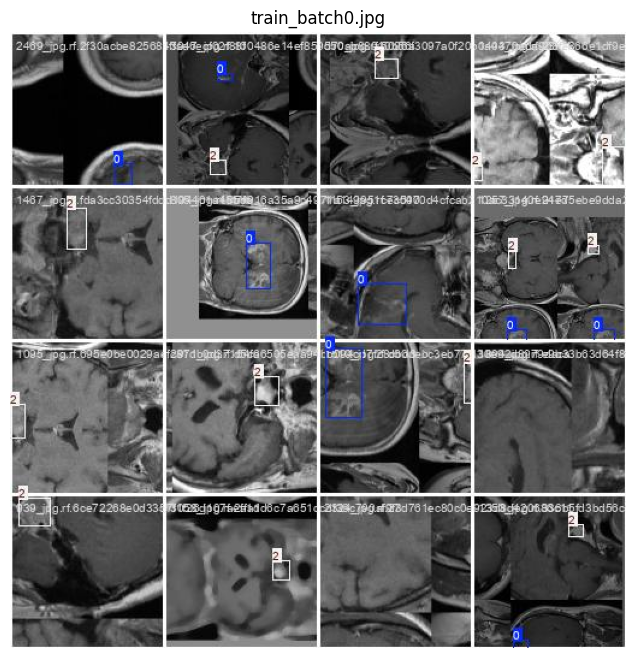

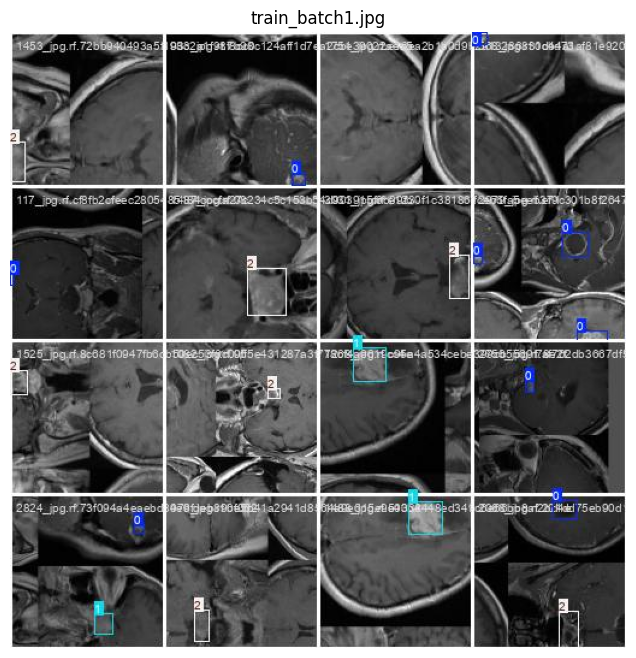

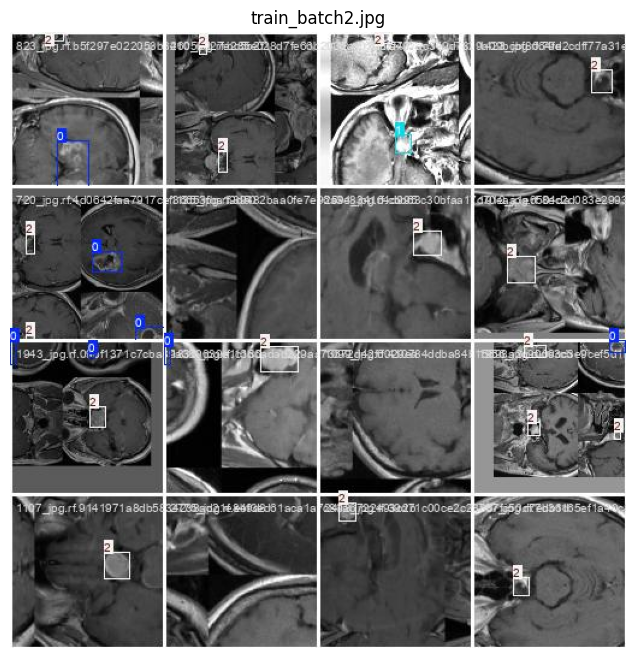

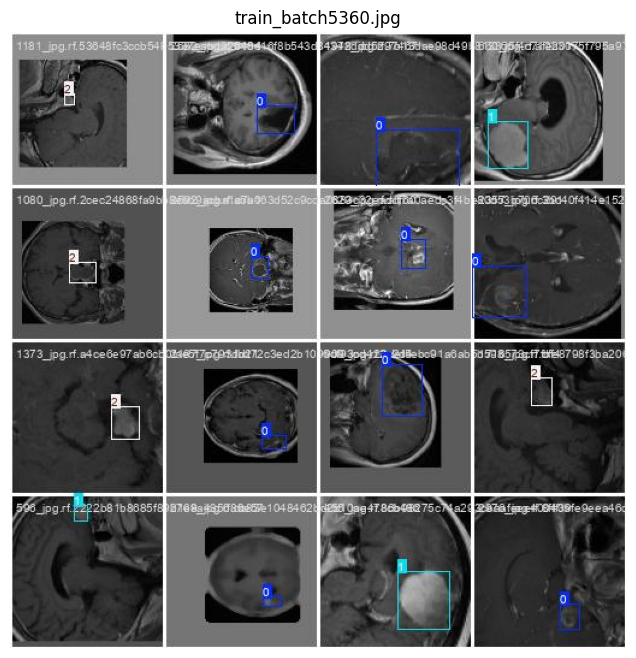

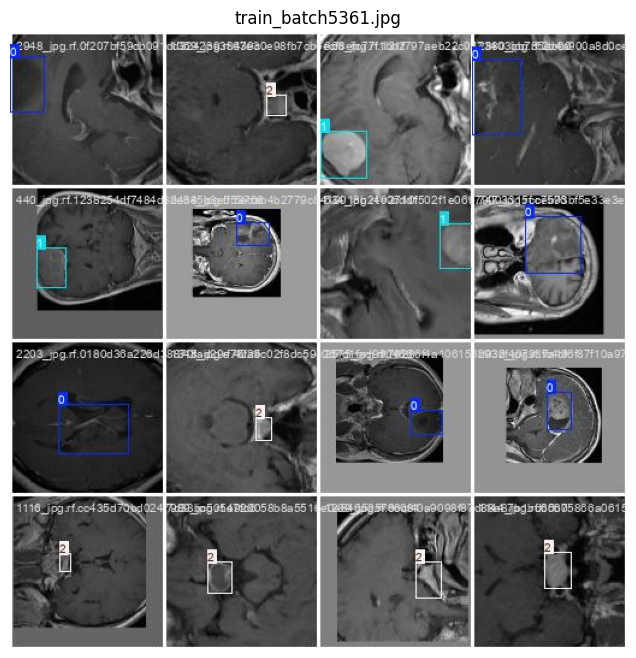

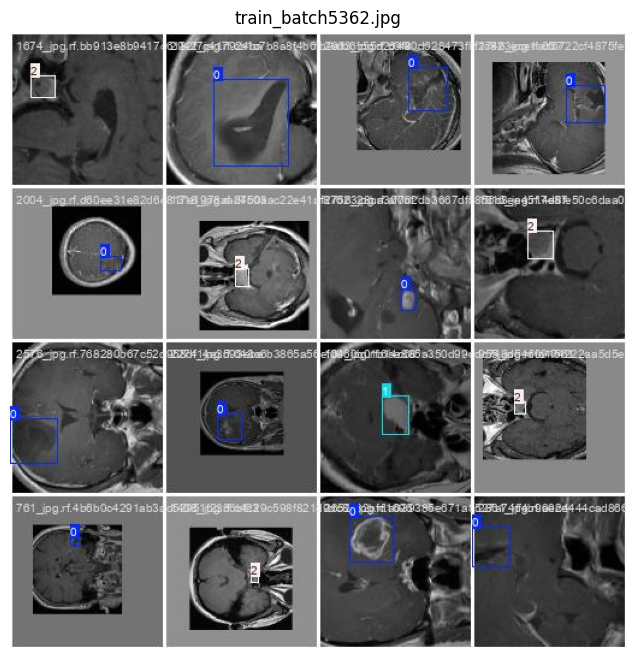

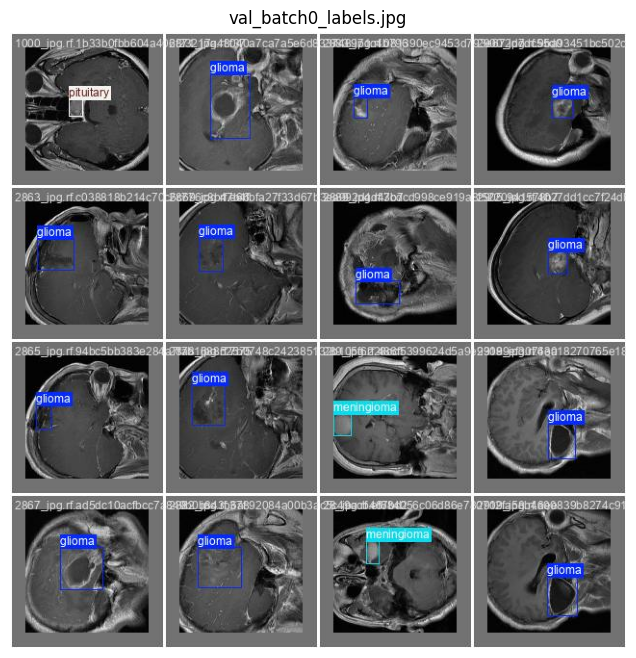

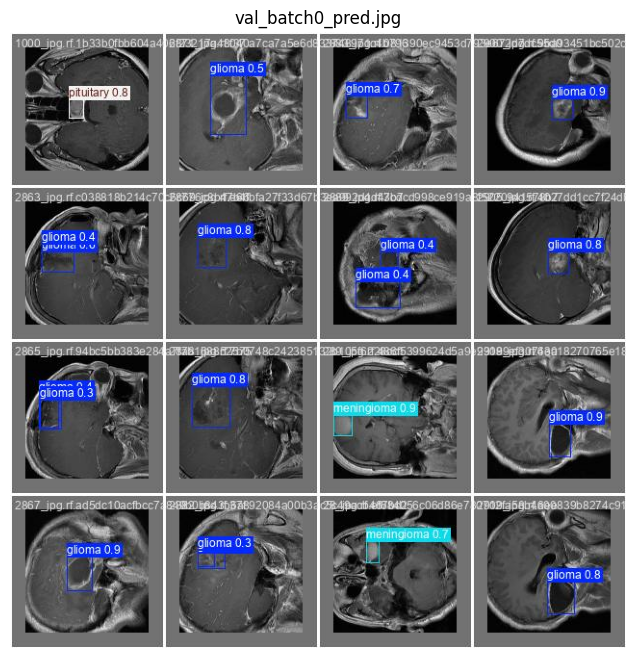

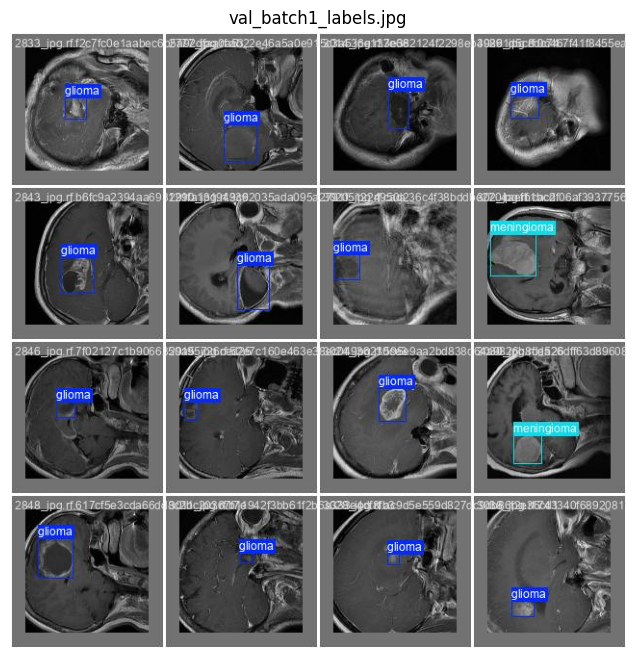

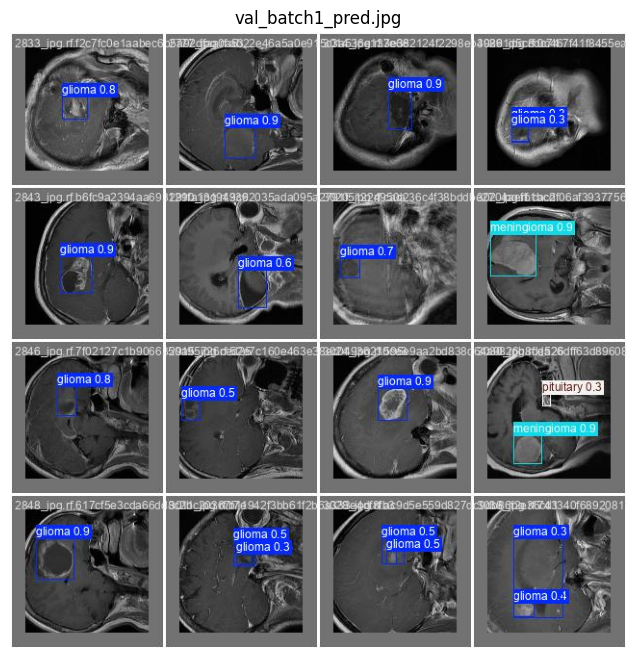

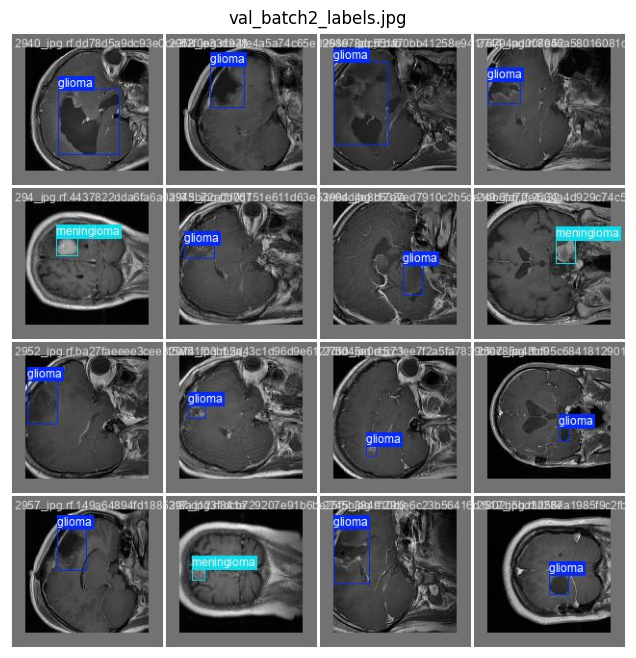

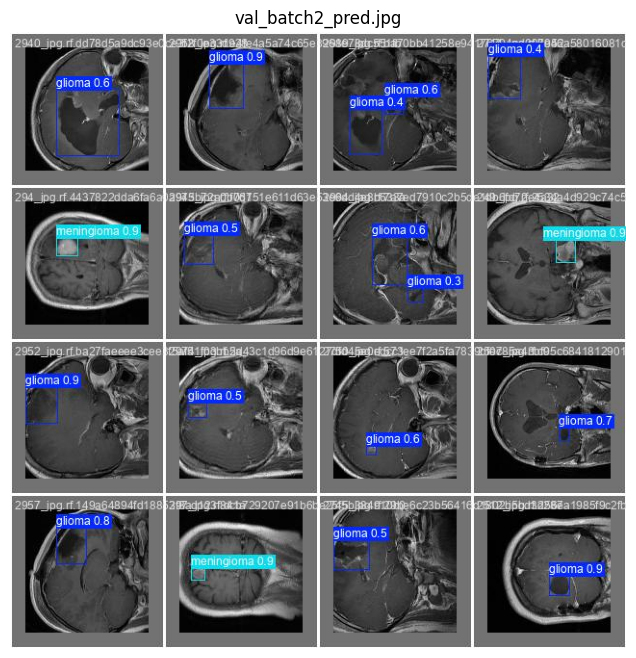

In [6]:
from imutils import paths

log_dir = "/kaggle/working/runs/detect/yolov11_m"
for image_path in sorted(paths.list_images(log_dir)):
    image = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

In [2]:
model = YOLO(r'C:\Users\Mit\Desktop\runs\detect\yolov11_m2\weights\best.pt')

results = model(r"C:\Users\Mit\Desktop\ML Datasets\miniproject sem6\test\images\10_jpg.rf.efaf1af26de11dabdda3214f4457c931.jpg")
results[0].show()


image 1/1 C:\Users\Mit\Desktop\ML Datasets\miniproject sem6\test\images\10_jpg.rf.efaf1af26de11dabdda3214f4457c931.jpg: 128x128 1 glioma, 1 meningioma, 103.0ms
Speed: 1.0ms preprocess, 103.0ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)
